In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


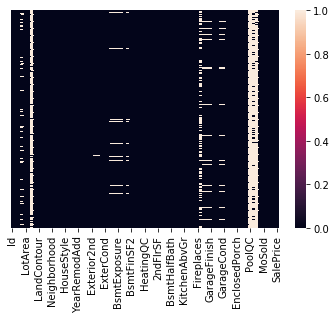

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
g = df.columns.to_series().groupby(df.dtypes).groups
print(g)

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object'), dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'), dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', '

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<BarContainer object of 81 artists>

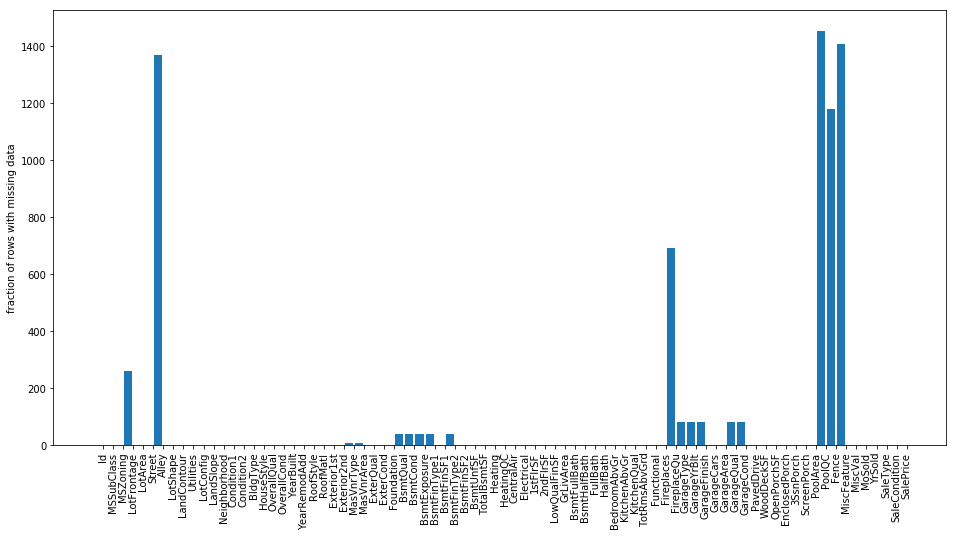

In [9]:
null_counts = df.isnull().sum()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [10]:
# Replaxe null values with Mean of LotFrontage
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
#df.head()

In [11]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [12]:
df.drop(['Alley', 'PoolQC', 'Fence'],axis=1,inplace=True)
df.shape

(1460, 78)

In [13]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [14]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [15]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [16]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])      
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])  
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])   
df.shape

(1460, 78)

In [17]:
# Fill missing values of GarageYrBuilt with corresponding values from YearBuilt
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

In [18]:
# axis=1 when you want to refer to a column
df.drop(['MiscFeature'],axis=1,inplace=True)
df.shape

(1460, 77)

In [19]:
df['Fireplaces']=df['Fireplaces'].fillna(df['Fireplaces'].mode()[0]) 

In [20]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0]) 

<BarContainer object of 77 artists>

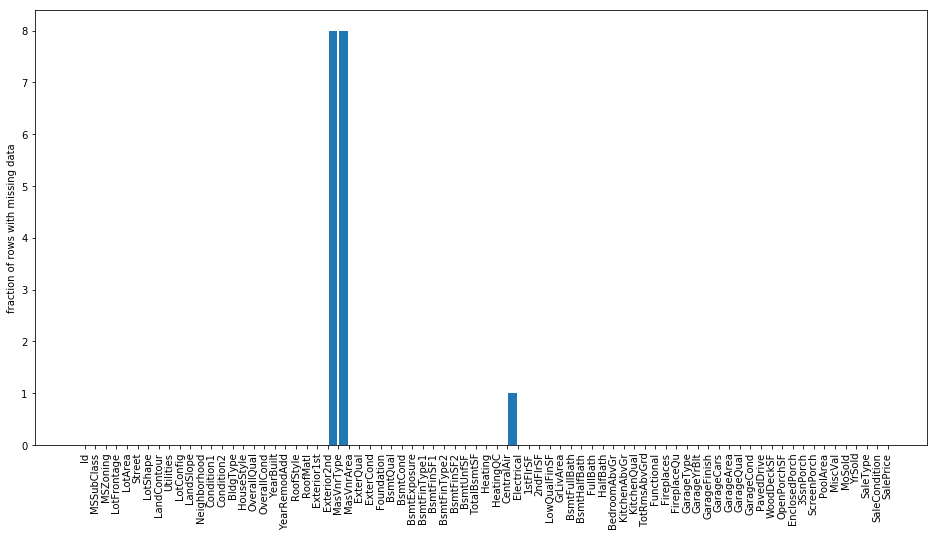

In [21]:
null_counts = df.isnull().sum()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [23]:
df.drop(['Id'],axis=1,inplace=True)
df.shape

(1460, 76)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [25]:
# Drop all rows with zero values - 1460 rows come down to 1451 - 74 columns 
df = df.dropna(how='any',axis=0) 
df.shape

(1451, 76)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 no

<BarContainer object of 76 artists>

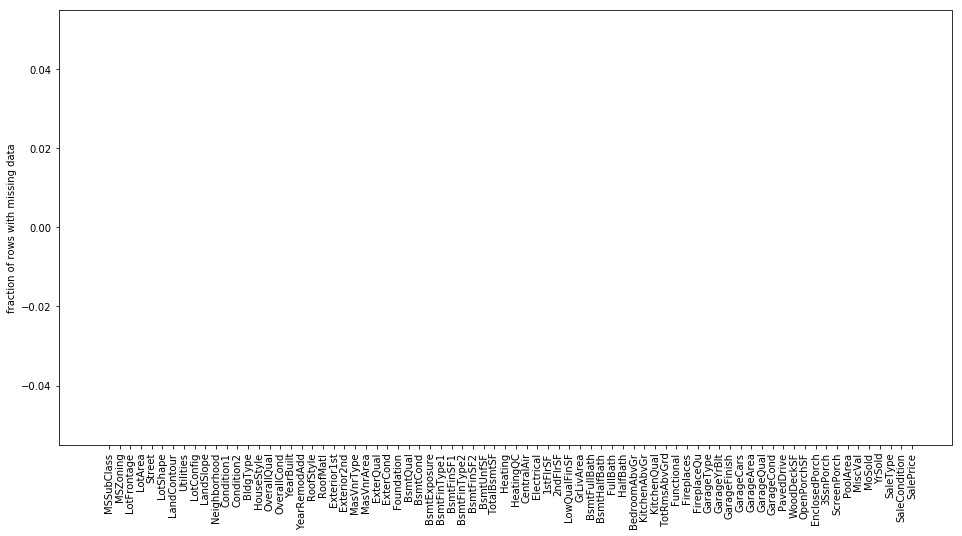

In [27]:
null_counts = df.isnull().sum()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

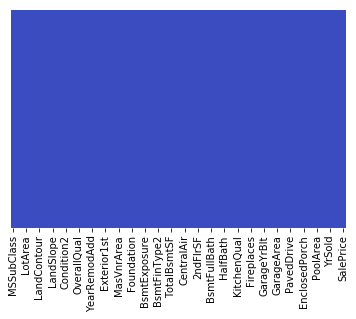

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [29]:
#Handle Categorical Features
#list(df.columns)
#df.info()
#df._get_numeric_data()
#df.select_dtypes(include=['int']).dtypes
col = df.select_dtypes(include=['object'])
#df.select_dtypes(include=['float'])
list(col)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [30]:
columns=['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [31]:
len(columns)

39

In [32]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:     
        print(fields)
        
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
          
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [33]:
main_df=df.copy()

In [34]:
df.shape

(1451, 76)

In [35]:
main_df.shape
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 no

In [36]:
test_df = pd.read_csv('../input/test-dataset/formulated_test (1).csv')

In [37]:
test_df.shape
#test_df.head()

(1434, 75)

In [38]:
final_df=pd.concat([df,test_df],axis=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [39]:
final_df.shape
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 0 to 1433
Data columns (total 76 columns):
1stFlrSF         2885 non-null int64
2ndFlrSF         2885 non-null int64
3SsnPorch        2885 non-null int64
BedroomAbvGr     2885 non-null int64
BldgType         2885 non-null object
BsmtCond         2885 non-null object
BsmtExposure     2885 non-null object
BsmtFinSF1       2885 non-null float64
BsmtFinSF2       2885 non-null float64
BsmtFinType1     2885 non-null object
BsmtFinType2     2885 non-null object
BsmtFullBath     2885 non-null float64
BsmtHalfBath     2885 non-null float64
BsmtQual         2885 non-null object
BsmtUnfSF        2885 non-null float64
CentralAir       2885 non-null object
Condition1       2885 non-null object
Condition2       2885 non-null object
Electrical       2885 non-null object
EnclosedPorch    2885 non-null int64
ExterCond        2885 non-null object
ExterQual        2885 non-null object
Exterior1st      2885 non-null object
Exterior2nd      28

In [40]:
final_df.iloc[1440:1490]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1449,630,0,0,1,Twnhs,TA,Av,553.0,0.0,GLQ,...,WD,0,Pave,3,630.0,AllPub,0,1970,1970,2006
1450,896,896,0,4,Duplex,TA,No,0.0,0.0,Unf,...,WD,0,Pave,8,896.0,AllPub,32,1974,1974,2009
1451,1578,0,0,3,1Fam,TA,No,0.0,0.0,Unf,...,New,0,Pave,7,1573.0,AllPub,0,2008,2009,2009
1452,1072,0,0,2,TwnhsE,TA,Gd,547.0,0.0,GLQ,...,WD,0,Pave,5,547.0,AllPub,0,2005,2005,2006
1453,1140,0,0,3,1Fam,TA,No,0.0,0.0,Unf,...,WD,0,Pave,6,1140.0,AllPub,36,2006,2006,2006
1454,1221,0,0,2,1Fam,TA,No,410.0,0.0,GLQ,...,WD,0,Pave,6,1221.0,AllPub,0,2004,2005,2009
1455,953,694,0,3,1Fam,TA,No,0.0,0.0,Unf,...,WD,0,Pave,7,953.0,AllPub,0,1999,2000,2007
1456,2073,0,0,3,1Fam,TA,No,790.0,163.0,ALQ,...,WD,0,Pave,7,1542.0,AllPub,349,1978,1988,2010
1457,1188,1152,0,4,1Fam,Gd,No,275.0,0.0,GLQ,...,WD,0,Pave,9,1152.0,AllPub,0,1941,2006,2010
1458,1078,0,0,2,1Fam,TA,Mn,49.0,1029.0,GLQ,...,WD,0,Pave,5,1078.0,AllPub,366,1950,1996,2010


In [41]:
final_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       

In [42]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [43]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 0 to 1433
Columns: 237 entries, 1stFlrSF to Partial
dtypes: float64(12), int64(25), uint8(200)
memory usage: 1.4 MB


In [44]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 0 to 1433
Columns: 177 entries, 1stFlrSF to Partial
dtypes: float64(12), int64(25), uint8(140)
memory usage: 1.2 MB


In [46]:
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,0,0,1,0,0,0,1,0
1430,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,0,0,1,0,0,0,0,0
1431,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
1432,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
df_Train=final_df.iloc[:1451,:]
df_Test=final_df.iloc[1451:,:]

In [48]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
df_Train.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1455,953,694,0,3,0.0,0.0,0.0,0.0,953.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,2073,0,0,3,790.0,163.0,1.0,0.0,589.0,0,...,0,0,0,0,1,0,0,0,1,0
1457,1188,1152,0,4,275.0,0.0,0.0,0.0,877.0,0,...,0,0,0,0,1,0,0,0,1,0
1458,1078,0,0,2,49.0,1029.0,1.0,0.0,0.0,112,...,0,0,0,0,1,0,0,0,1,0
1459,1256,0,0,3,830.0,290.0,1.0,0.0,136.0,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,1,0,0,0,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,1,0,0,0,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,1,0,0,0,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
df_Test.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1429,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,0,0,1,0,0,0,1,0
1430,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,0,0,1,0,0,0,0,0
1431,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
1432,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,0,0,1,0,0,0,1,0
1433,996,1004,0,3,758.0,0.0,0.0,0.0,238.0,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
df_Test.shape

(1434, 176)

In [54]:
df_Train.shape

(1451, 177)

In [55]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

**PREDICTION MODELING USING KERAS**

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 176))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss= 'mean_squared_error', optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=176, units=50, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1160 samples, validate on 291 samples
Epoch 1/1000
1160/1160 [==============================] - 1s 452us/step - loss: 23370231972.4138 - val_loss: 6831956006.0481
Epoch 2/1000
1160/1160 [==============================] - 0s 171us/step - loss: 11071784972.6897 - val_loss: 6395015258.3918
Epoch 3/1000
1160/1160 [==============================] - 0s 165us/step - loss: 9559909959.7241 - val_loss: 6061574010.6117
Epoch 4/1000
1160/1160 [==============================] - 0s 161us/step - loss: 8525701033.1034 - val_loss: 5740476120.1924
Epoch 5/1000
1160/1160 [==============================] - 0s 164us/step - loss: 7827714180.4138 - val_loss: 5532749099.8763
Epoch 6/1000
1160/1160 [==============================] - 0s 163us/step - loss: 7167991508.4138 - val_loss: 5278532822.4330
Epoch 7/1000
1160/1160 [==============================] - 0s 163us/step - loss: 6594321412.4138 - val_loss: 5093802222.9553
Epoch 8/1000
1160/1160 [==============================] - 0s 161us/step - loss: 608

1160/1160 [==============================] - 0s 193us/step - loss: 1518239439.3103 - val_loss: 3349030876.0412
Epoch 67/1000
1160/1160 [==============================] - 0s 165us/step - loss: 1497501143.3103 - val_loss: 3554660644.1787
Epoch 68/1000
1160/1160 [==============================] - 0s 164us/step - loss: 1498795342.6207 - val_loss: 3415609324.2062
Epoch 69/1000
1160/1160 [==============================] - 0s 167us/step - loss: 1489720120.8276 - val_loss: 3442932716.4261
Epoch 70/1000
1160/1160 [==============================] - 0s 164us/step - loss: 1466717015.1724 - val_loss: 3335830075.8213
Epoch 71/1000
1160/1160 [==============================] - 0s 175us/step - loss: 1493826918.8966 - val_loss: 3476964063.6701
Epoch 72/1000
1160/1160 [==============================] - 0s 161us/step - loss: 1472378364.8276 - val_loss: 3537846731.4364
Epoch 73/1000
1160/1160 [==============================] - 0s 162us/step - loss: 1487001241.7241 - val_loss: 3595103730.5842
Epoch 74/1000


1160/1160 [==============================] - 0s 182us/step - loss: 1317570426.6207 - val_loss: 3548558579.4639
Epoch 132/1000
1160/1160 [==============================] - 0s 184us/step - loss: 1308292880.9655 - val_loss: 3398342655.3402
Epoch 133/1000
1160/1160 [==============================] - 0s 182us/step - loss: 1341112031.0345 - val_loss: 3435134316.7560
Epoch 134/1000
1160/1160 [==============================] - 0s 193us/step - loss: 1308601151.7241 - val_loss: 3436279957.6632
Epoch 135/1000
1160/1160 [==============================] - 0s 180us/step - loss: 1307675913.2414 - val_loss: 3558321945.0722
Epoch 136/1000
1160/1160 [==============================] - 0s 183us/step - loss: 1315441366.3448 - val_loss: 3532822599.2577
Epoch 137/1000
1160/1160 [==============================] - 0s 178us/step - loss: 1305510442.0000 - val_loss: 3581450085.1684
Epoch 138/1000
1160/1160 [==============================] - 0s 179us/step - loss: 1304218285.2069 - val_loss: 3497837651.2440
Epoch 1

1160/1160 [==============================] - 0s 164us/step - loss: 1241096025.9310 - val_loss: 3332426301.0309
Epoch 197/1000
1160/1160 [==============================] - 0s 169us/step - loss: 1182789117.5862 - val_loss: 3325126912.7698
Epoch 198/1000
1160/1160 [==============================] - 0s 165us/step - loss: 1183329260.0000 - val_loss: 3291626544.4948
Epoch 199/1000
1160/1160 [==============================] - 0s 166us/step - loss: 1192192240.2069 - val_loss: 3388848086.7629
Epoch 200/1000
1160/1160 [==============================] - 0s 171us/step - loss: 1199862046.6207 - val_loss: 3355793274.5017
Epoch 201/1000
1160/1160 [==============================] - 0s 167us/step - loss: 1199102339.8621 - val_loss: 3174197259.6564
Epoch 202/1000
1160/1160 [==============================] - 0s 164us/step - loss: 1179521429.3793 - val_loss: 3149586325.2234
Epoch 203/1000
1160/1160 [==============================] - 0s 164us/step - loss: 1189503228.2759 - val_loss: 3416667438.9553
Epoch 2

1160/1160 [==============================] - 0s 160us/step - loss: 1089754724.2069 - val_loss: 2941840251.2715
Epoch 262/1000
1160/1160 [==============================] - 0s 160us/step - loss: 1075629915.1724 - val_loss: 2879918813.0309
Epoch 263/1000
1160/1160 [==============================] - 0s 159us/step - loss: 1075290162.1379 - val_loss: 2891782754.5567
Epoch 264/1000
1160/1160 [==============================] - 0s 164us/step - loss: 1084804710.7586 - val_loss: 2955516383.6701
Epoch 265/1000
1160/1160 [==============================] - 0s 164us/step - loss: 1077751931.1724 - val_loss: 2999657314.0893
Epoch 266/1000
1160/1160 [==============================] - 0s 161us/step - loss: 1071995618.2759 - val_loss: 2888539293.1409
Epoch 267/1000
1160/1160 [==============================] - 0s 159us/step - loss: 1075173752.9655 - val_loss: 2998304783.1753
Epoch 268/1000
1160/1160 [==============================] - 0s 162us/step - loss: 1073053042.6207 - val_loss: 2877461048.3024
Epoch 2

1160/1160 [==============================] - 0s 163us/step - loss: 960234862.9655 - val_loss: 2613933876.8935
Epoch 327/1000
1160/1160 [==============================] - 0s 163us/step - loss: 952023551.3103 - val_loss: 2601288577.2096
Epoch 328/1000
1160/1160 [==============================] - 0s 161us/step - loss: 967953727.1724 - val_loss: 2578176442.8316
Epoch 329/1000
1160/1160 [==============================] - 0s 160us/step - loss: 967806552.5517 - val_loss: 2718891301.8282
Epoch 330/1000
1160/1160 [==============================] - 0s 163us/step - loss: 963195327.1034 - val_loss: 2771225595.6014
Epoch 331/1000
1160/1160 [==============================] - 0s 161us/step - loss: 965064742.1379 - val_loss: 2583125451.8763
Epoch 332/1000
1160/1160 [==============================] - 0s 165us/step - loss: 956972267.0345 - val_loss: 2529509305.7320
Epoch 333/1000
1160/1160 [==============================] - 0s 177us/step - loss: 952042584.7586 - val_loss: 2472081206.6529
Epoch 334/1000


1160/1160 [==============================] - 0s 164us/step - loss: 858450006.8276 - val_loss: 2173987818.5567
Epoch 392/1000
1160/1160 [==============================] - 0s 169us/step - loss: 821005575.1724 - val_loss: 2159857195.1065
Epoch 393/1000
1160/1160 [==============================] - 0s 165us/step - loss: 848259033.2759 - val_loss: 2215173153.8694
Epoch 394/1000
1160/1160 [==============================] - 0s 164us/step - loss: 824238047.3103 - val_loss: 2177767651.4089
Epoch 395/1000
1160/1160 [==============================] - 0s 168us/step - loss: 845677342.0690 - val_loss: 2183518834.3643
Epoch 396/1000
1160/1160 [==============================] - 0s 166us/step - loss: 844716871.4483 - val_loss: 2197393658.3918
Epoch 397/1000
1160/1160 [==============================] - 0s 169us/step - loss: 823878565.8621 - val_loss: 2131229784.0825
Epoch 398/1000
1160/1160 [==============================] - 0s 167us/step - loss: 841390384.0345 - val_loss: 2184288419.5189
Epoch 399/1000


1160/1160 [==============================] - 0s 163us/step - loss: 735705289.9828 - val_loss: 1968043818.7766
Epoch 457/1000
1160/1160 [==============================] - 0s 160us/step - loss: 722164026.9655 - val_loss: 1866879477.6632
Epoch 458/1000
1160/1160 [==============================] - 0s 160us/step - loss: 741525641.5172 - val_loss: 2014688553.1271
Epoch 459/1000
1160/1160 [==============================] - 0s 163us/step - loss: 734409484.7586 - val_loss: 1883277037.7457
Epoch 460/1000
1160/1160 [==============================] - 0s 166us/step - loss: 731384413.2414 - val_loss: 1837874373.7182
Epoch 461/1000
1160/1160 [==============================] - 0s 167us/step - loss: 720701099.1724 - val_loss: 1871756450.0893
Epoch 462/1000
1160/1160 [==============================] - 0s 165us/step - loss: 740571448.6552 - val_loss: 1939719339.7663
Epoch 463/1000
1160/1160 [==============================] - 0s 160us/step - loss: 736052233.2414 - val_loss: 2046257784.8522
Epoch 464/1000


1160/1160 [==============================] - 0s 169us/step - loss: 656384062.7586 - val_loss: 1665461098.3368
Epoch 522/1000
1160/1160 [==============================] - 0s 166us/step - loss: 668194553.4483 - val_loss: 1783629394.1993
Epoch 523/1000
1160/1160 [==============================] - 0s 163us/step - loss: 672563536.5517 - val_loss: 1621781330.5842
Epoch 524/1000
1160/1160 [==============================] - 0s 163us/step - loss: 652201168.1379 - val_loss: 1583261012.5086
Epoch 525/1000
1160/1160 [==============================] - 0s 164us/step - loss: 644839613.0345 - val_loss: 1641983541.6632
Epoch 526/1000
1160/1160 [==============================] - 0s 170us/step - loss: 663493075.9310 - val_loss: 1654019133.1409
Epoch 527/1000
1160/1160 [==============================] - 0s 171us/step - loss: 632922645.1034 - val_loss: 1621901552.0550
Epoch 528/1000
1160/1160 [==============================] - 0s 165us/step - loss: 656472803.6897 - val_loss: 1616957558.3230
Epoch 529/1000


1160/1160 [==============================] - 0s 163us/step - loss: 596519067.0345 - val_loss: 1409271007.2302
Epoch 587/1000
1160/1160 [==============================] - 0s 162us/step - loss: 583078700.2414 - val_loss: 1423304082.3643
Epoch 588/1000
1160/1160 [==============================] - 0s 165us/step - loss: 589045448.2759 - val_loss: 1407299312.4948
Epoch 589/1000
1160/1160 [==============================] - 0s 179us/step - loss: 596751386.3793 - val_loss: 1392891111.2577
Epoch 590/1000
1160/1160 [==============================] - 0s 171us/step - loss: 601967226.7586 - val_loss: 1528574866.3643
Epoch 591/1000
1160/1160 [==============================] - 0s 166us/step - loss: 640306996.3448 - val_loss: 1487250521.5120
Epoch 592/1000
1160/1160 [==============================] - 0s 166us/step - loss: 589469189.5862 - val_loss: 1438112565.8832
Epoch 593/1000
1160/1160 [==============================] - 0s 166us/step - loss: 580472894.6897 - val_loss: 1449525735.8076
Epoch 594/1000


1160/1160 [==============================] - 0s 196us/step - loss: 539276348.0690 - val_loss: 1342589743.1203
Epoch 652/1000
1160/1160 [==============================] - 0s 198us/step - loss: 554794642.0000 - val_loss: 1282076512.6598
Epoch 653/1000
1160/1160 [==============================] - 0s 185us/step - loss: 527786133.9310 - val_loss: 1344480179.2440
Epoch 654/1000
1160/1160 [==============================] - 0s 186us/step - loss: 538192350.2069 - val_loss: 1258258407.9725
Epoch 655/1000
1160/1160 [==============================] - 0s 188us/step - loss: 549379802.1034 - val_loss: 1296519831.9725
Epoch 656/1000
1160/1160 [==============================] - 0s 194us/step - loss: 531344583.7241 - val_loss: 1297105844.1237
Epoch 657/1000
1160/1160 [==============================] - 0s 188us/step - loss: 545994947.8621 - val_loss: 1304268797.4708
Epoch 658/1000
1160/1160 [==============================] - 0s 186us/step - loss: 548315739.6552 - val_loss: 1372534337.2096
Epoch 659/1000


1160/1160 [==============================] - 0s 161us/step - loss: 513870846.3448 - val_loss: 1205745898.2268
Epoch 717/1000
1160/1160 [==============================] - 0s 162us/step - loss: 514310401.3448 - val_loss: 1273058368.8797
Epoch 718/1000
1160/1160 [==============================] - 0s 162us/step - loss: 531752507.6552 - val_loss: 1252422932.2337
Epoch 719/1000
1160/1160 [==============================] - 0s 166us/step - loss: 508461117.9310 - val_loss: 1255243517.6907
Epoch 720/1000
1160/1160 [==============================] - 0s 161us/step - loss: 489854520.5172 - val_loss: 1207081755.9313
Epoch 721/1000
1160/1160 [==============================] - 0s 163us/step - loss: 490983509.1724 - val_loss: 1215642913.2096
Epoch 722/1000
1160/1160 [==============================] - 0s 162us/step - loss: 499675546.3103 - val_loss: 1350843758.6254
Epoch 723/1000
1160/1160 [==============================] - 0s 162us/step - loss: 519383116.2759 - val_loss: 1173368816.7148
Epoch 724/1000


1160/1160 [==============================] - 0s 162us/step - loss: 464183604.4828 - val_loss: 1211199959.8625
Epoch 782/1000
1160/1160 [==============================] - 0s 159us/step - loss: 472500446.8103 - val_loss: 1243341005.1959
Epoch 783/1000
1160/1160 [==============================] - 0s 166us/step - loss: 493906078.4138 - val_loss: 1188027874.4192
Epoch 784/1000
1160/1160 [==============================] - 0s 161us/step - loss: 462419215.3793 - val_loss: 1214814619.4914
Epoch 785/1000
1160/1160 [==============================] - 0s 164us/step - loss: 501697642.4138 - val_loss: 1185955831.0928
Epoch 786/1000
1160/1160 [==============================] - 0s 169us/step - loss: 479827447.9310 - val_loss: 1196590702.4055
Epoch 787/1000
1160/1160 [==============================] - 0s 166us/step - loss: 467741483.6552 - val_loss: 1243418863.1753
Epoch 788/1000
1160/1160 [==============================] - 0s 164us/step - loss: 450298022.9655 - val_loss: 1254442758.7079
Epoch 789/1000


1160/1160 [==============================] - 0s 162us/step - loss: 459811566.4483 - val_loss: 1180857927.9175
Epoch 847/1000
1160/1160 [==============================] - 0s 164us/step - loss: 437000171.7931 - val_loss: 1138555295.8351
Epoch 848/1000
1160/1160 [==============================] - 0s 161us/step - loss: 441646939.3793 - val_loss: 1220050728.6873
Epoch 849/1000
1160/1160 [==============================] - 0s 166us/step - loss: 430697302.1379 - val_loss: 1142698423.2577
Epoch 850/1000
1160/1160 [==============================] - 0s 161us/step - loss: 425699629.8621 - val_loss: 1176979192.7423
Epoch 851/1000
1160/1160 [==============================] - 0s 160us/step - loss: 435526837.9310 - val_loss: 1168324602.0619
Epoch 852/1000
1160/1160 [==============================] - 0s 164us/step - loss: 454975119.9310 - val_loss: 1169709814.6529
Epoch 853/1000
1160/1160 [==============================] - 0s 166us/step - loss: 429260377.7241 - val_loss: 1149102117.8282
Epoch 854/1000


1160/1160 [==============================] - 0s 167us/step - loss: 408898562.7931 - val_loss: 1200203465.8969
Epoch 912/1000
1160/1160 [==============================] - 0s 166us/step - loss: 408529751.1724 - val_loss: 1094667290.8866
Epoch 913/1000
1160/1160 [==============================] - 0s 162us/step - loss: 400578880.6207 - val_loss: 1110031091.3540
Epoch 914/1000
1160/1160 [==============================] - 0s 161us/step - loss: 405931622.1034 - val_loss: 1158212797.1409
Epoch 915/1000
1160/1160 [==============================] - 0s 163us/step - loss: 404791715.6552 - val_loss: 1121342215.1478
Epoch 916/1000
1160/1160 [==============================] - 0s 165us/step - loss: 457679891.5862 - val_loss: 1108020265.8969
Epoch 917/1000
1160/1160 [==============================] - 0s 161us/step - loss: 411394388.3448 - val_loss: 1106978238.6804
Epoch 918/1000
1160/1160 [==============================] - 0s 161us/step - loss: 431718501.0690 - val_loss: 1260402522.3918
Epoch 919/1000


1160/1160 [==============================] - 0s 183us/step - loss: 434942136.7586 - val_loss: 1156015782.8179
Epoch 977/1000
1160/1160 [==============================] - 0s 164us/step - loss: 392470872.4138 - val_loss: 1139033922.5292
Epoch 978/1000
1160/1160 [==============================] - 0s 166us/step - loss: 416890388.3103 - val_loss: 1075732999.1478
Epoch 979/1000
1160/1160 [==============================] - 0s 167us/step - loss: 401278461.8103 - val_loss: 1335834905.0722
Epoch 980/1000
1160/1160 [==============================] - 0s 171us/step - loss: 387897169.4655 - val_loss: 1143387960.6323
Epoch 981/1000
1160/1160 [==============================] - 0s 187us/step - loss: 405343043.2069 - val_loss: 1109181281.2646
Epoch 982/1000
1160/1160 [==============================] - 0s 174us/step - loss: 384757256.6552 - val_loss: 1062264321.0997
Epoch 983/1000
1160/1160 [==============================] - 0s 168us/step - loss: 401623441.4828 - val_loss: 1084081406.1856
Epoch 984/1000


In [62]:
ann_pred=classifier.predict(df_Test)

In [64]:
df_pred = ann_pred

In [59]:
df_pred.shape

(1434, 1)

In [60]:
df_pred

array([[109551.59],
       [137548.53],
       [176661.61],
       ...,
       [151885.03],
       [113569.56],
       [211512.17]], dtype=float32)

In [61]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))